In [18]:
DATA_PATH =r"C:\Users\Mohamed Gad\OneDrive\Desktop\All About Data Science\Data Sciience Projects\End to End - Ai-Pro\V1\iti project\AI-Pro Project\data\processed\1_preprcoessed_df.pkl"

In [33]:
TECH_COLS = [ 'DatabaseWorkedWith', 'LanguageWorkedWith', 'MiscTechWorkedWith',  'WebframeWorkedWith']
TECH_NEXT_COLS = ['DatabaseDesireNextYear', 'LanguageDesireNextYear', 'MiscTechDesireNextYear', 'WebframeDesireNextYear',]
ROLE_COLS = ["DevType"]

In [32]:
raw_df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MultiLabelBinarizer

pd.options.display.max_rows =1000

In [20]:
raw_df = pd.read_pickle(DATA_PATH)

In [21]:
raw_df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13.0,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",[ASP.NET Core],"[ASP.NET, ASP.NET Core]",Just as welcome now as I felt last year,50.0,36.0,27.0
1,2,I am a developer by profession,No,NaN,19.0,,NaN,NaN,United Kingdom,Pound sterling,...,,,,"Computer science, computer engineering, or sof...",[],[],Somewhat more welcome now than last year,NaN,7.0,4.0
2,3,I code primarily as a hobby,Yes,NaN,15.0,,NaN,NaN,Russian Federation,,...,Neither easy nor difficult,Appropriate in length,,,[],[],Somewhat more welcome now than last year,NaN,4.0,NaN
3,4,I am a developer by profession,Yes,25.0,18.0,,NaN,NaN,Albania,Albanian lek,...,,,No,"Computer science, computer engineering, or sof...",[],[],Somewhat less welcome now than last year,40.0,7.0,4.0
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16.0,,NaN,NaN,United States,,...,Easy,Too short,No,"Computer science, computer engineering, or sof...","[Django, Ruby on Rails]",[Ruby on Rails],Just as welcome now as I felt last year,NaN,15.0,8.0


## General
##### Total number of answers

In [22]:
print ("Number of answers:",raw_df.shape[0])

Number of answers: 64461


#### Geographical distributions

In [23]:
raw_df['Country'].nunique()

184

Since there are 184 country we should remove countries with few number of answers

In [24]:
raw_df['Country'].value_counts(ascending=True)

Marshall Islands                                 1
Saint Lucia                                      1
Lesotho                                          1
Nauru                                            1
Fiji                                             1
Kiribati                                         1
Grenada                                          1
Chad                                             1
Mali                                             1
Gabon                                            1
Micronesia, Federated States of...               1
North Korea                                      1
Liechtenstein                                    1
Papua New Guinea                                 2
Djibouti                                         2
San Marino                                       2
Solomon Islands                                  2
Cape Verde                                       2
Burundi                                          2
Monaco                         

In [25]:
(raw_df['Country'].value_counts() > 150).sum()

60

In [26]:
184 - 124

60

In [27]:
countries = (raw_df['Country'].value_counts() > 150)[0:60]
countries

United States         True
India                 True
United Kingdom        True
Germany               True
Canada                True
France                True
Brazil                True
Netherlands           True
Poland                True
Australia             True
Spain                 True
Italy                 True
Russian Federation    True
Sweden                True
Pakistan              True
Turkey                True
Israel                True
Switzerland           True
Bangladesh            True
Romania               True
Nigeria               True
Mexico                True
Ukraine               True
Austria               True
Czech Republic        True
Indonesia             True
South Africa          True
Iran                  True
Belgium               True
Ireland               True
Philippines           True
Denmark               True
Argentina             True
Greece                True
                      True
Portugal              True
Norway                True
C

In [28]:
# we will remove countries with answers less than 150
top60countires = raw_df[raw_df['Country'].isin(countries.index.values)]
top60countires['Country'].nunique()

60

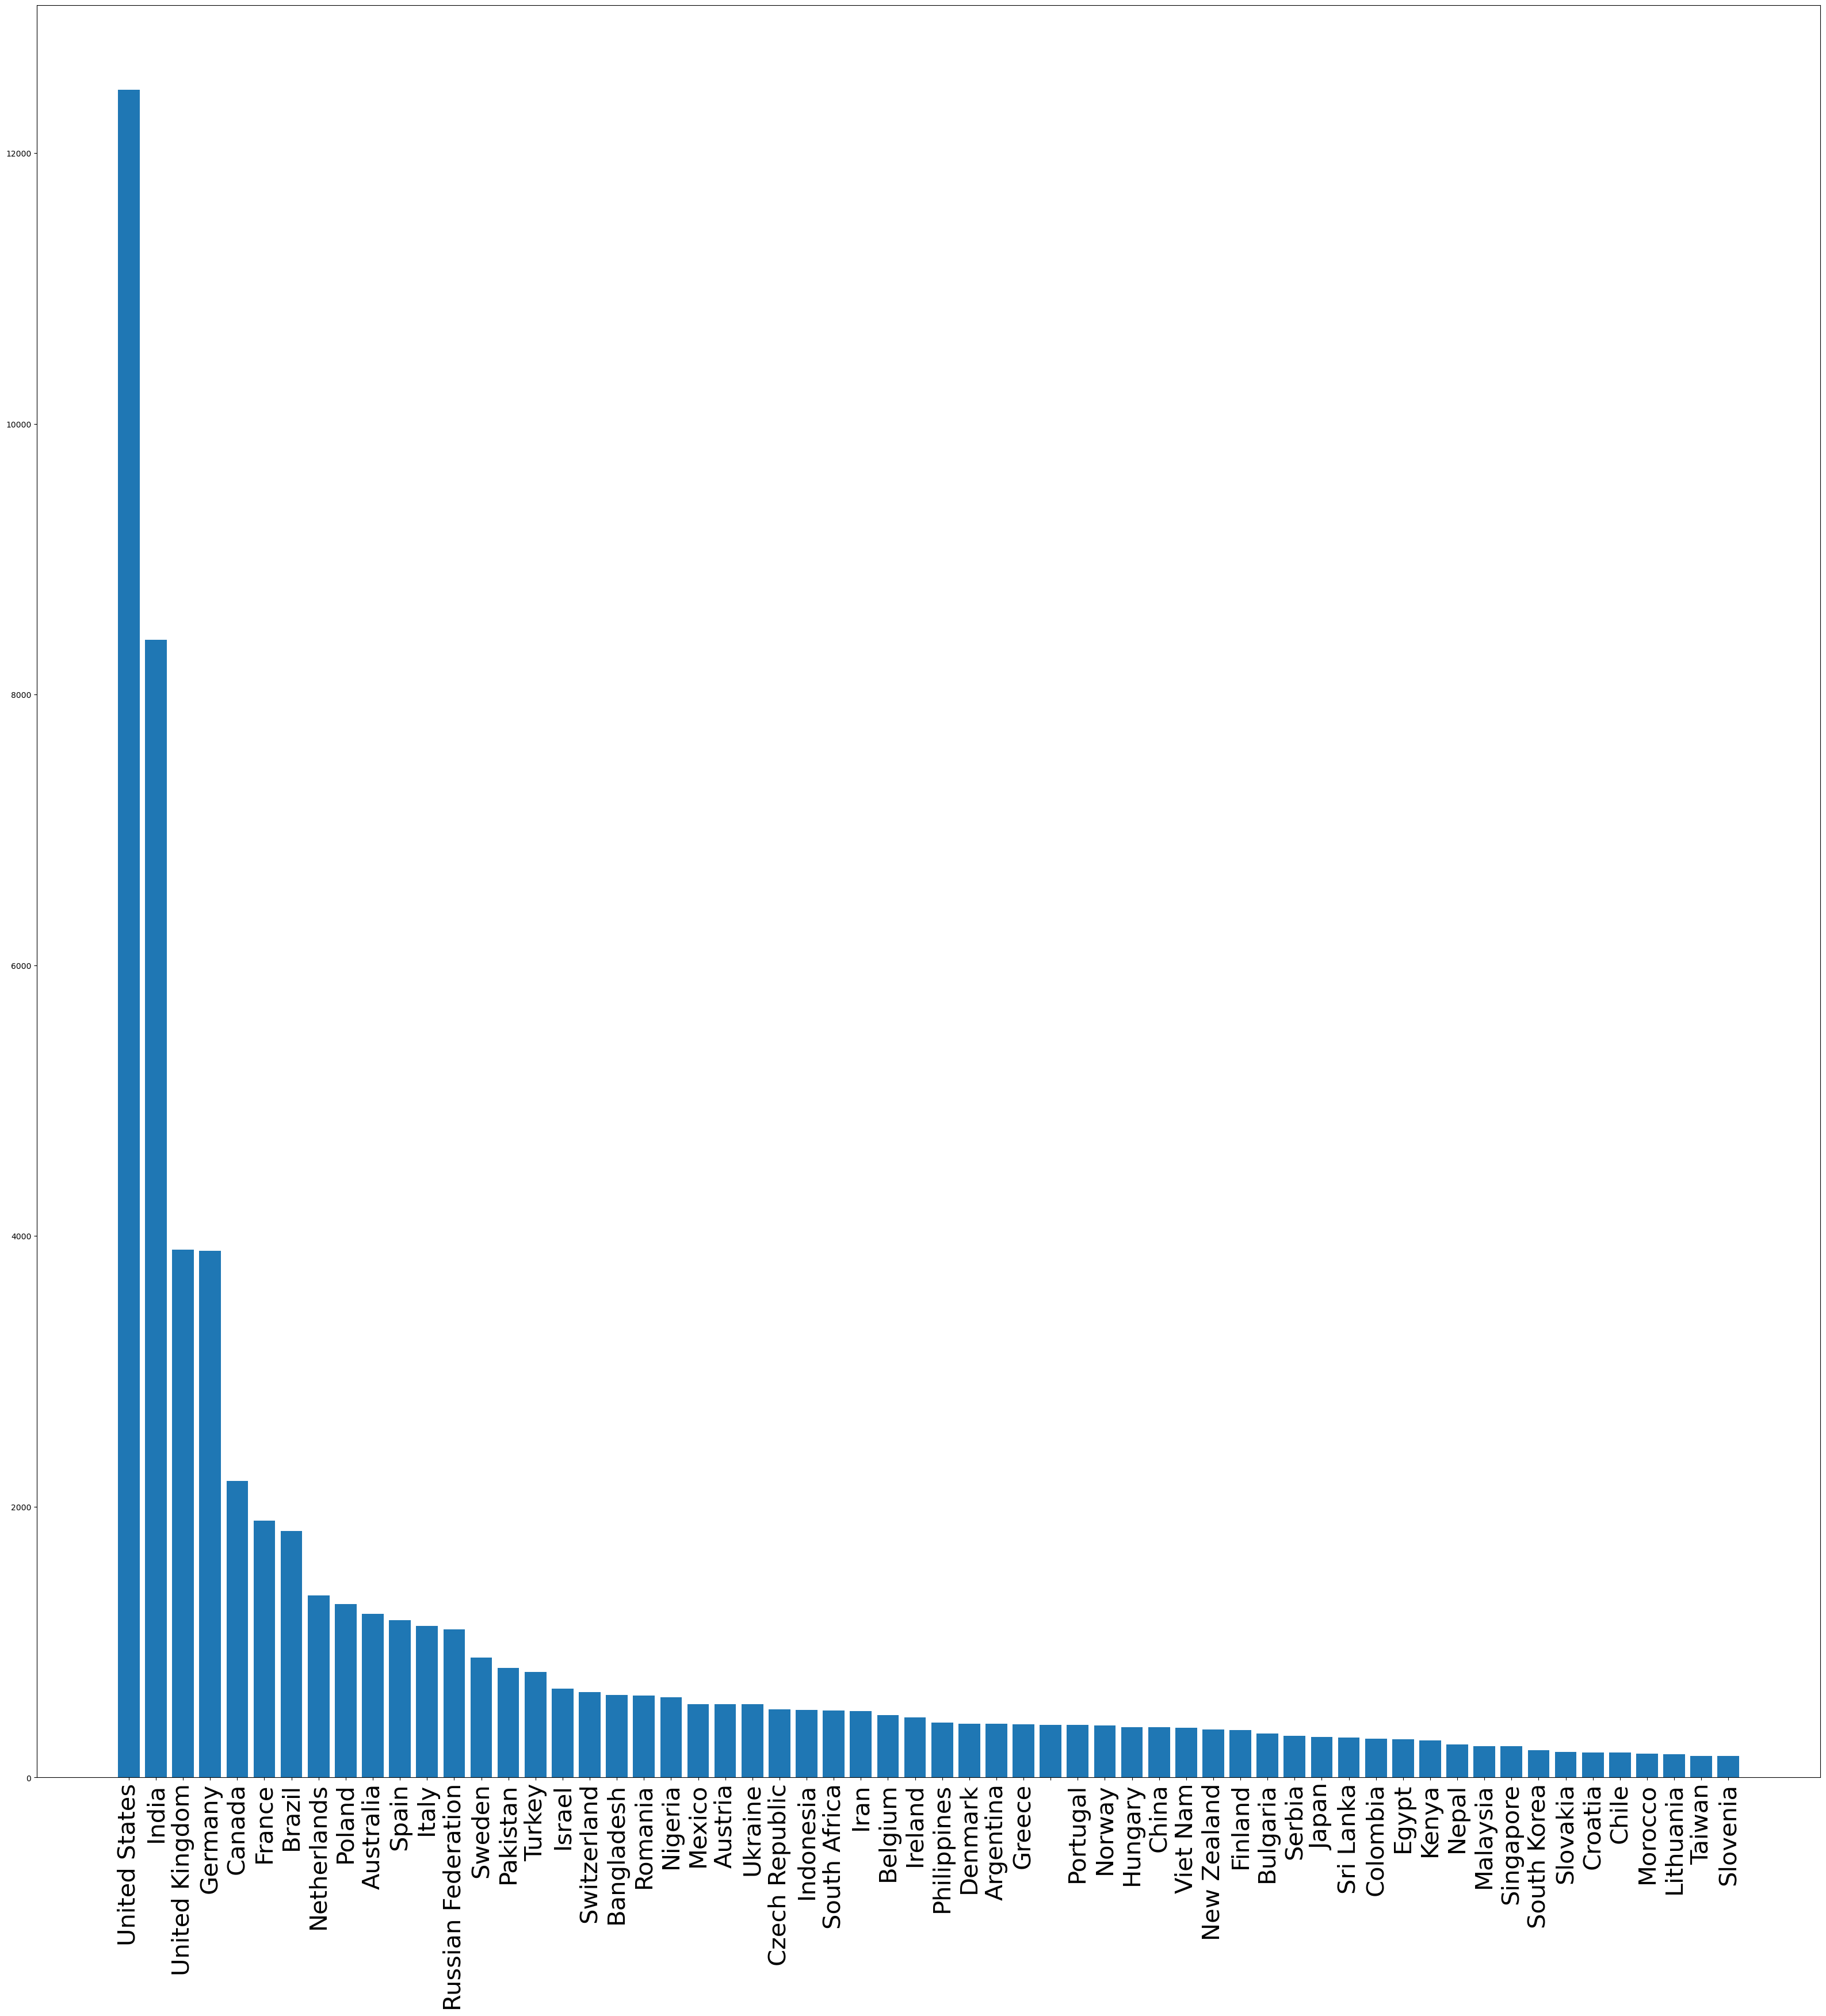

In [29]:
bar = top60countires['Country'].value_counts()
fig = plt.figure(figsize=(40,40))
plt.bar(bar.index.values, bar.values)
plt.xticks(rotation=90, fontsize=30);

In [30]:
raw_df.head(2)

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13.0,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",[ASP.NET Core],"[ASP.NET, ASP.NET Core]",Just as welcome now as I felt last year,50.0,36.0,27.0
1,2,I am a developer by profession,No,NaN,19.0,,NaN,NaN,United Kingdom,Pound sterling,...,,,,"Computer science, computer engineering, or sof...",[],[],Somewhat more welcome now than last year,NaN,7.0,4.0


## Skills
#### Freq. of each skill

In [39]:
df = raw_df.copy()
encoded_dfs = {}
for col in TECH_COLS + ROLE_COLS :
    mlb = MultiLabelBinarizer() 

    encdoed_df = pd.DataFrame(mlb.fit_transform(df[col]), columns=mlb.classes_, index=df[col].index)
    encoded_dfs[col] = encdoed_df

In [45]:
#merging
df= pd.concat(encoded_dfs, axis=1)
df.shap

AttributeError: 'DataFrame' object has no attribute 'shapr'

#### How are the skills correlated with each others

## Jobs
#### Freq. of each job

#### How are the jobs correlated with each others

## Relation
##### How are the skills coreelated with the jobs

#### What is the specificity of each skill to a job